In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
df=pd.read_csv('co2emission.csv')

In [3]:
df.describe()
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.670529,24.505835,13.155542,8.351294,8.408363,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,...,0.293837,0.412017,0.350371,0.315602,0.299445,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,...,1.243406,1.252789,1.330843,1.254617,1.291328,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.122595,5.867130,5.916597,5.900753,5.832170,NaN,NaN,NaN,NaN,NaN


In [4]:
li=[]
i=1960
for i in range(1960,2015):
    li.append(df[str(i)].mean())
print(li)

[2.044178390793474, 2.157479864612687, 2.248804922234259, 2.763420508468537, 2.9126800680583633, 3.0316694687680505, 3.044699653151321, 3.11118631039457, 3.3093329675861205, 3.9191244998744716, 4.197480374441901, 4.421934022171001, 4.488119374050183, 4.805842462757311, 4.499457508288618, 4.366105995064503, 4.356608858163115, 4.486631686322526, 4.5110171351857185, 4.56301375171817, 4.464373396895399, 3.9935487840470927, 3.8724678090734477, 3.7268202549780467, 3.824386691028607, 3.917695550952998, 3.905446716964806, 3.942603194258269, 4.077311975172728, 4.213261544573976, 4.082445945212627, 4.1212466636367875, 4.479572514120304, 4.502859007030892, 4.424655464717061, 4.474822216535954, 4.4940497638889045, 4.492356496479426, 4.482341602264682, 4.450072664303414, 4.578757215491835, 4.631754758142363, 4.598493646548026, 4.730172571204212, 4.777434844199243, 4.821384876018388, 4.89978631683787, 4.930891345825242, 4.9368292291074445, 4.722804110816154, 4.845600978891713, 4.806688992085348, 4.9

In [5]:
lii=[str(i) for i in range(1960,2015)]
print(lii)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [6]:
data={'year':lii,'avg_co2emissions':li}

In [7]:
d = pd.DataFrame(data)
d

,year,avg_co2emissions
0,1960,2.044178
1,1961,2.157480
2,1962,2.248805
3,1963,2.763421
4,1964,2.912680
5,1965,3.031669
6,1966,3.044700
7,1967,3.111186
8,1968,3.309333
9,1969,3.919124


In [8]:
maximumavg=max(d['avg_co2emissions'])
print(maximumavg)
x=d.index[d['avg_co2emissions']==maximumavg]
print(d.iloc[x])

4.949244606997713
    year  avg_co2emissions
52  2012          4.949245


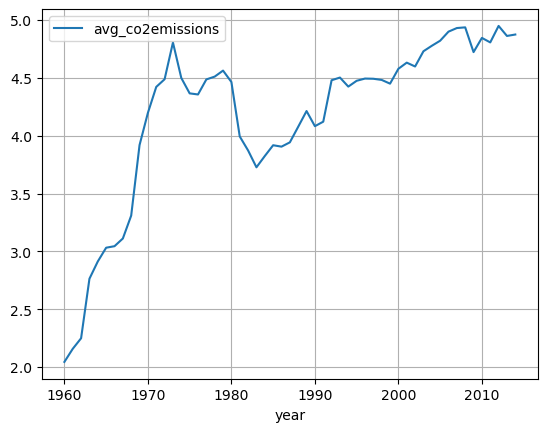

In [9]:
d.plot(x='year', y='avg_co2emissions')
plt.grid()

In [10]:
import pandas as pd
City = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
Country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
MajorCity = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
State = pd.read_csv("GlobalLandTemperaturesByState.csv")
GlobalTemperatures = pd.read_csv("GlobalTemperatures.csv")

In [11]:
GlobalTemperatures.describe()
GlobalTemperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
GlobalTemperatures=GlobalTemperatures.dropna(axis=0,how='any')

In [13]:
GlobalTemperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


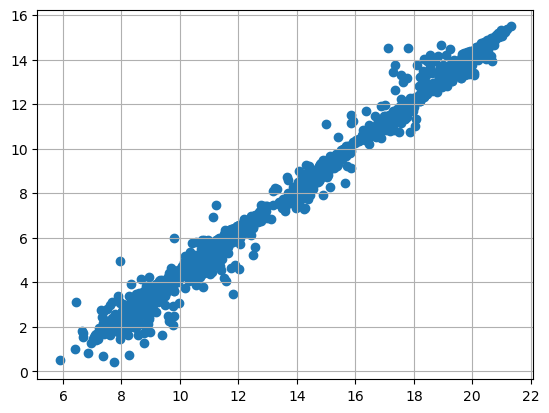

In [14]:
plt.scatter(GlobalTemperatures['LandMaxTemperature'],GlobalTemperatures['LandAverageTemperature'])
plt.grid()

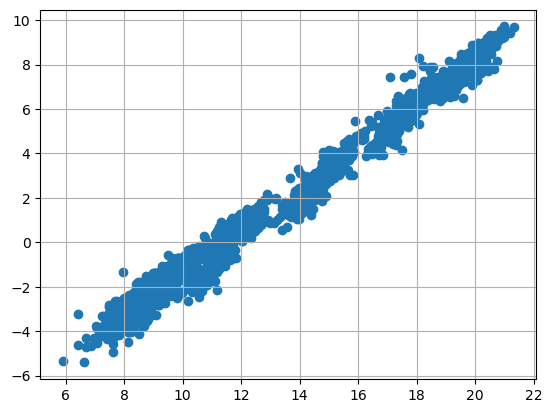

In [15]:
plt.scatter(GlobalTemperatures['LandMaxTemperature'],GlobalTemperatures['LandMinTemperature'])
plt.grid()

In [16]:
India = City[City.Country == 'India']

In [17]:
India.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E
3943,1796-02-01,21.632,1.770,Ahmadabad,India,23.31N,72.52E
3944,1796-03-01,24.953,2.427,Ahmadabad,India,23.31N,72.52E
3945,1796-04-01,30.297,1.827,Ahmadabad,India,23.31N,72.52E
3946,1796-05-01,33.223,1.496,Ahmadabad,India,23.31N,72.52E


In [32]:
Hyderabad=India.dropna(axis=0,how='any')

In [33]:
Hyderabad.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

In [34]:
Hyderabad.shape

(34627, 7)

<AxesSubplot:xlabel='dt'>

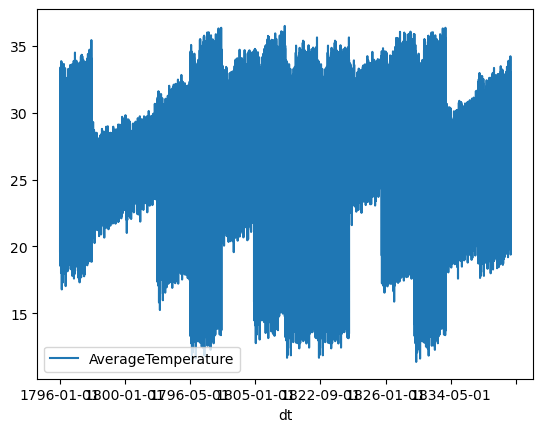

In [35]:
Hyderabad.plot(x='dt',y='AverageTemperature')

In [39]:
India['year']=pd.DatetimeIndex(Hyderabad['dt']).year

ValueError: Length of values (34627) does not match length of index (36582)

In [40]:
Hyderabad.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
3942,1796-01-01,19.649,2.286,Ahmadabad,India,23.31N,72.52E,1796
3943,1796-02-01,21.632,1.770,Ahmadabad,India,23.31N,72.52E,1796
3944,1796-03-01,24.953,2.427,Ahmadabad,India,23.31N,72.52E,1796
3945,1796-04-01,30.297,1.827,Ahmadabad,India,23.31N,72.52E,1796
3946,1796-05-01,33.223,1.496,Ahmadabad,India,23.31N,72.52E,1796


<AxesSubplot:xlabel='year'>

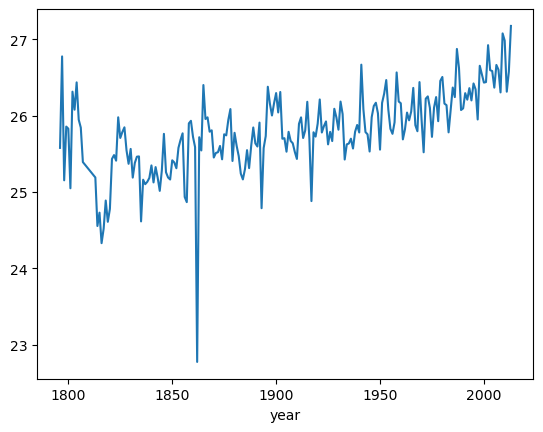

In [41]:
Hyderabad.groupby('year')['AverageTemperature'].mean().plot(x='year',y='AverageTemperature')

In [42]:
X=Hyderabad['year'].values.reshape(-1,1)
y=Hyderabad['AverageTemperature'].values.reshape(-1,1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [45]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[14.95800097]
[[0.00568903]]


In [46]:
y_pred = regressor.predict(X_test)

In [47]:
h=pd.DataFrame([2014,2015,2016,2017,2018,2019,2020,2021,2022]).values.reshape(-1,1)

In [48]:
h_pred=regressor.predict(h)
h_pred

array([[26.41570619],
       [26.42139522],
       [26.42708425],
       [26.43277328],
       [26.43846231],
       [26.44415134],
       [26.44984037],
       [26.4555294 ],
       [26.46121843]])

In [49]:
pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
pred

,Actual,Predicted
0,18.633,25.277900
1,19.430,25.641998
2,29.186,26.017474
3,24.666,25.789913
4,29.049,25.505461
...,...,...
6921,25.012,25.767157
6922,22.322,25.607864
6923,26.522,25.573730
6924,28.089,25.232388


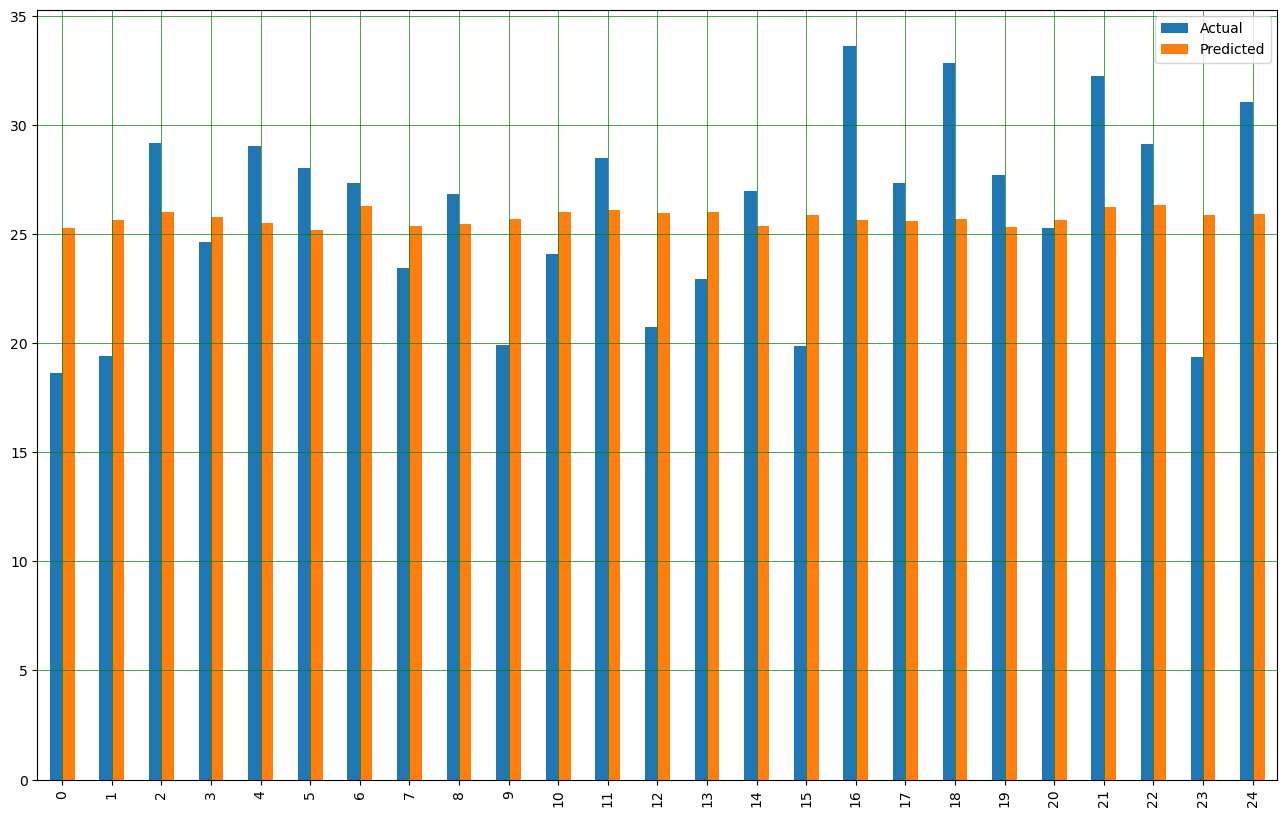

In [50]:
pred1 = pred.head(25)
pred1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

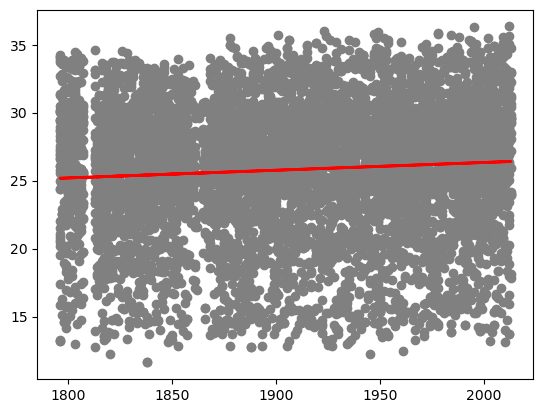

In [51]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.892236823458079
Mean Squared Error: 23.53262695115012
Root Mean Squared Error: 4.851043903238779


In [53]:
cities=['Hyderabad','New Delhi','Bombay','Pune','Kochi','Srinagar']
city_temp = India[India.City.isin(cities)]

<AxesSubplot:xlabel='City'>

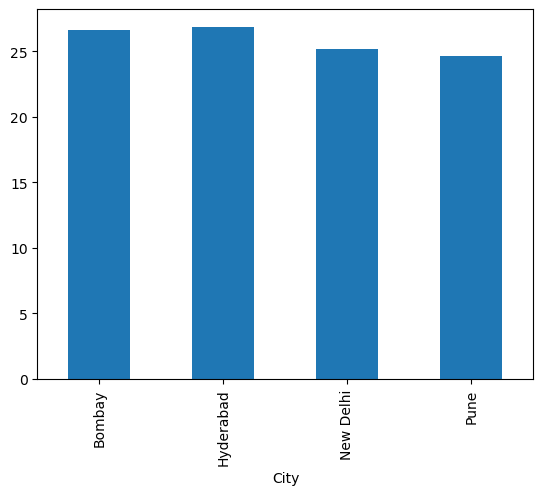

In [54]:
city_temp.groupby('City')['AverageTemperature'].mean().plot(kind='bar')